<a href="https://colab.research.google.com/github/donrj05/Project_DSP/blob/main/PR_PROJECT_GROUP_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#run the cells in order as no cell is connected to another
#created by group14 of pr team
#first svm gaussian classifier,then k nearest neighbours and then PCA done in svm gaussian classifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors              
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
x1=np.loadtxt('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',delimiter=",")#training data
x2=np.loadtxt('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',delimiter=",")#testing data
print(len(x1))
print(len(x2))

3823
1797


In [ ]:
#separating labels from data 
#in optdigits.tra,65th column is class label 
count=0
x_train=[]
y_train=[]
for i in x1:
    x=[]
    for j in i:
        count=count+1
        if count<65:
            x.append(j)
        elif count==65:
            y_train.append(j)
            x_train.append(x)
            count=0
print(len(y_train))

3823


In [ ]:
#in optdigits.tes 65th column is label
count=0
x_test=[]
y_test=[]
for i in x2:
    x=[]
    for j in i:
        count=count+1
        if count<65:
            x.append(j)
        elif count==65:
            y_test.append(j)
            x_test.append(x)
            count=0
print(len(x_test))

1797


In [ ]:
#findout optimal parameters for gausian SVM
param_grid=[
    {'C' : [0.5,1,10,100,1000],
     'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.001],
     'kernel':['rbf'] },
]
optimal_params= GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',

)
optimal_params.fit(x_train, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
#create a gaussian classifier
clf=svm.SVC(gamma=0.001,C=10)
clf.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

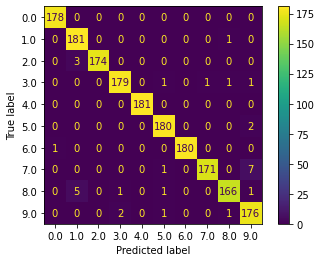

In [ ]:
#plotting confusion matrix
plot_confusion_matrix(clf,
                      x_test,
                      y_test,
                      values_format='d',
                     )

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
8


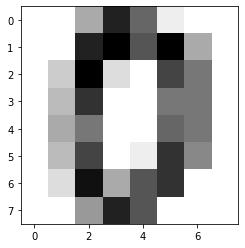

In [ ]:
#showing related data of 1stimage 
z=x_test[0]
x11=np.array(z)
x1_new=x11.reshape(8,8)
print(x1_new)
print(len(x1_new))
plt.imshow(x1_new,cmap=plt.cm.gray_r,interpolation="nearest")

In [ ]:
#predictions of testing data
y_prediction=[]
for q in x_test:
    x=clf.predict([q])
    y_prediction.append(x[0])
#print(y_prediction[0])
#print(y_test[0])
print('accuracy percentage:',100*accuracy_score(y_test, y_prediction,normalize=True))
print('no of correct predictions:',accuracy_score(y_test, y_prediction,normalize=False))

accuracy percentage: 98.27490261547022
no of correct predictions: 1766


1759

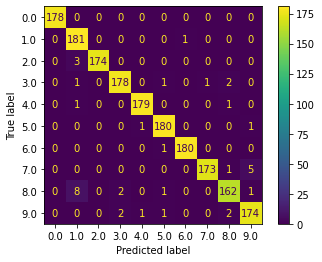

In [ ]:
#creating a k-nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(x_test)
#plot confusion matrix
plot_confusion_matrix(knn,
                      x_test,
                      y_test,
                      values_format='d',
                     )
accuracy_score(y_test, y_pred,normalize=False)

In [ ]:
#checking the accuracies for different values of k
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  c=accuracy_score(y_test, y_pred,normalize=True)
  d=accuracy_score(y_test,  y_pred,normalize=False)
  print(' value of k:',i,'accuracy:',c,'no of correct predictions:',d)

 value of k: 1 accuracy: 0.9799666110183639 no of correct predictions: 1761
 value of k: 2 accuracy: 0.9738452977184195 no of correct predictions: 1750
 value of k: 3 accuracy: 0.9782971619365609 no of correct predictions: 1758
 value of k: 4 accuracy: 0.9766277128547579 no of correct predictions: 1755
 value of k: 5 accuracy: 0.9788536449638287 no of correct predictions: 1759
 value of k: 6 accuracy: 0.9777406789092933 no of correct predictions: 1757
 value of k: 7 accuracy: 0.9766277128547579 no of correct predictions: 1755
 value of k: 8 accuracy: 0.9766277128547579 no of correct predictions: 1755
 value of k: 9 accuracy: 0.9771841958820257 no of correct predictions: 1756
 value of k: 10 accuracy: 0.9755147468002225 no of correct predictions: 1753
 value of k: 11 accuracy: 0.9794101279910963 no of correct predictions: 1760
 value of k: 12 accuracy: 0.9744017807456873 no of correct predictions: 1751
 value of k: 13 accuracy: 0.9738452977184195 no of correct predictions: 1750
 value o

In [ ]:
scaler = StandardScaler()# Fit on training set only.
scaler.fit(x_train)# Apply transform to both the training set and the test set.
train_img = scaler.transform(x_train)
test_img = scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(train_img)#training data only

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
clf1=svm.SVC(gamma=0.001,C=10)
clf1.fit(train_img,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(test_img[0])#to see how many features comes under 95% variance

[ 1.41486941 -1.44124599  4.2293756   1.91743401  0.40347585  0.17446024
  0.30247772 -1.4313465   0.12239598 -0.33822336 -1.14402     0.53209417
  0.13894315  0.20551207 -0.08137354 -0.27878808 -0.7334125   0.32093778
  0.15764024  0.47691036  0.24188298  0.53248189  0.52759574 -0.06290417
 -0.01674341  0.22595823  0.979749    0.01668102  0.55654265 -0.19055962
  0.0116634  -0.25010893 -0.53652301 -0.87263603 -0.11539865  0.16735476
  0.15236395  0.23424327  0.24068952 -0.41091758 -0.11940283]


In [ ]:
#predictions on testing data
y_img_prediction=[]
for q in test_img:
    x=clf1.predict([q])
    y_img_prediction.append(x[0])

#print(len(y_img_prediction))
#print(y_img_prediction[0])
print('accuracy:',100*accuracy_score(y_test, y_img_prediction,normalize=True))
print('no of correct predictions:',accuracy_score(y_test, y_img_prediction,normalize=False))

accuracy: 95.82637729549248
no of correct predictions: 1722


no of correct predictions: 1722


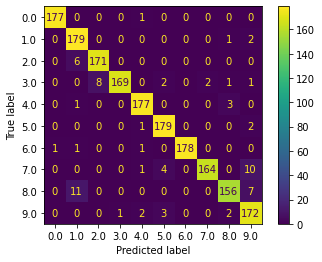

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf1,
                      test_img,
                      y_test,
                      values_format='d',
                     )
print('no of correct predictions:',accuracy_score(y_test, y_img_prediction,normalize=False))